## <b> K-Means Clustering </b>

In [1]:
import pandas as pd
import numpy as np

In [2]:
cereal = pd.read_csv('../Data/cereal.csv')

In [3]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cereal Name            74 non-null     object
 1   Manufacturer           74 non-null     object
 2   Calories               74 non-null     int64 
 3   Protein (g)            74 non-null     int64 
 4   Fat                    74 non-null     int64 
 5   Sugars                 74 non-null     int64 
 6   Vitamins and Minerals  74 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 4.2+ KB


In [4]:
cereal.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25


In [5]:
model_df = cereal.drop(columns=['Cereal Name','Manufacturer'])

In [6]:
model_df.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [7]:
model_df.describe()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,105.540541,2.500000,0.945946,6.770270,28.378378
std,18.442201,1.088546,0.963610,4.467684,22.787104
min,50.000000,1.000000,0.000000,-1.000000,0.000000
25%,100.000000,2.000000,0.000000,3.000000,25.000000
50%,110.000000,2.000000,1.000000,6.000000,25.000000
75%,110.000000,3.000000,1.000000,10.750000,25.000000
max,160.000000,6.000000,5.000000,15.000000,100.000000


In [8]:
## Scale the features

from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
model_df_std = sd.fit_transform(model_df)

pd.DataFrame(model_df_std, columns=model_df.columns).describe()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
count,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01
mean,-4.320868e-16,-1.200241e-17,-4.107075e-17,1.800362e-17,-4.275859e-17
std,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00
min,-3.032158e+00,-1.387392e+00,-9.883694e-01,-1.751089e+00,-1.253871e+00
25%,-3.024780e-01,-4.624639e-01,-9.883694e-01,-8.496586e-01,-1.492704e-01
50%,2.434579e-01,-4.624639e-01,5.647825e-02,-1.735862e-01,-1.492704e-01
75%,2.434579e-01,4.624639e-01,5.647825e-02,8.968619e-01,-1.492704e-01
max,2.973138e+00,3.237247e+00,4.235869e+00,1.854631e+00,3.164532e+00


In [9]:
## fit the dataset in K-Means model

from sklearn.cluster import KMeans

## Create an empty instance of KMeans class and fir the model

Km = KMeans(n_clusters=2, n_init='auto', verbose=1, random_state=42)
Km.fit(model_df_std)


Initialization complete
Iteration 0, inertia 514.4292069764023.
Iteration 1, inertia 291.28342249733606.
Iteration 2, inertia 282.3516034589868.
Iteration 3, inertia 276.6487049543771.
Iteration 4, inertia 273.2661482728989.
Iteration 5, inertia 269.8757863345034.
Iteration 6, inertia 266.80392704014804.
Iteration 7, inertia 265.93714956156236.
Converged at iteration 7: strict convergence.


KMeans(n_clusters=2, random_state=42, verbose=1)

In [10]:
pd.concat([model_df,pd.Series(Km.labels_,name='cluster')],axis=1)

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,cluster
0,70,4,1,6,25,1
1,120,3,5,8,0,0
2,70,4,1,5,25,1
3,50,4,0,0,25,1
4,110,2,2,8,25,0
...,...,...,...,...,...,...
69,110,2,1,3,25,1
70,110,1,1,12,25,0
71,100,3,1,3,25,1
72,100,3,1,3,25,1


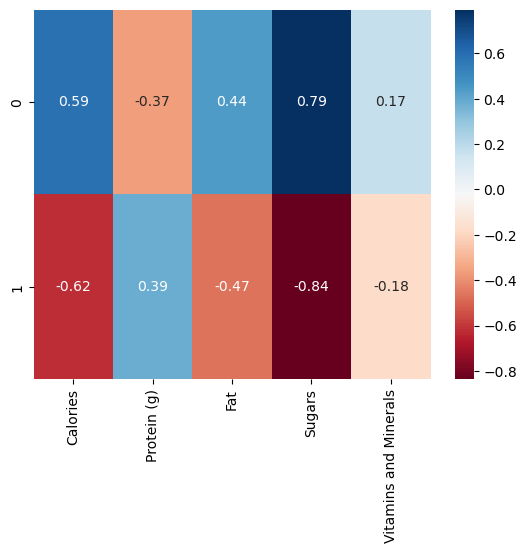

In [11]:
## Plot the cluster cenetrs in an seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(
    pd.DataFrame(Km.cluster_centers_, columns=model_df.columns),
    cmap='RdBu',
    annot=True,
    fmt='0.2f'
)
plt.show();



### Evaluating the model

In [12]:
Km.inertia_

265.93714956156236

In [13]:
## Create intertia plot to identify the optimum number of clusters
inertia_value = []

for k in range(2,16):
    Km = KMeans(n_clusters=k, n_init='auto', verbose=0, random_state=42)
    Km.fit(model_df_std)
    inertia_value.append(Km.inertia_)
    

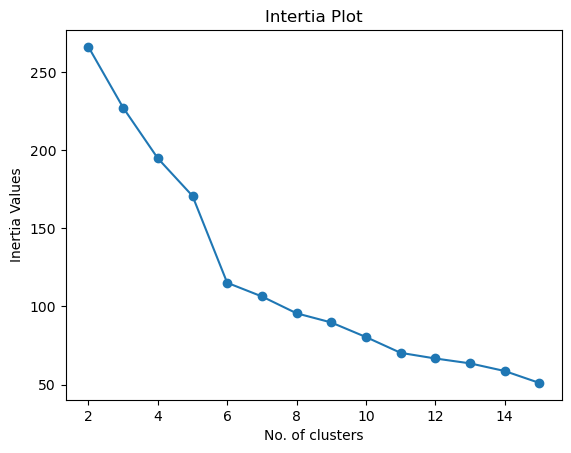

In [21]:
plt.plot(range(2,16),inertia_value,'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia Values')
plt.title('Intertia Plot')
plt.show();

Initialization complete
Iteration 0, inertia 342.03741981988094.
Iteration 1, inertia 226.5828413892395.
Iteration 2, inertia 219.06356706274983.
Iteration 3, inertia 203.65429015987536.
Iteration 4, inertia 196.81058913660655.
Iteration 5, inertia 194.71459746094024.
Converged at iteration 5: strict convergence.


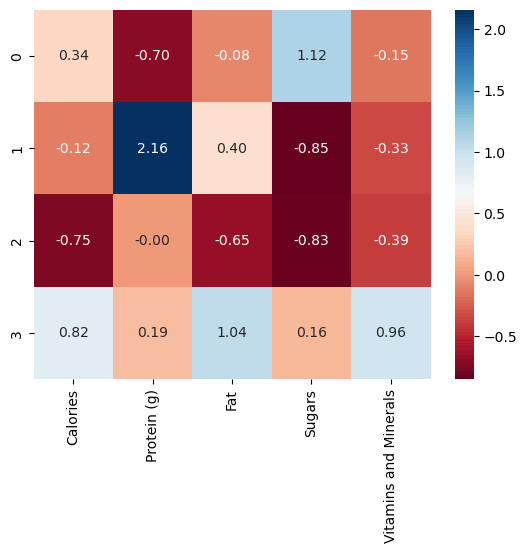

In [22]:
## Considering k as 4
Km = KMeans(n_clusters=4, n_init='auto',verbose=1,random_state=42)
Km.fit(model_df_std)

## Plot the cluster cenetrs in an seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(
    pd.DataFrame(Km.cluster_centers_, columns=model_df.columns),
    cmap='RdBu',
    annot=True,
    fmt='0.2f'
)
plt.show();

In [24]:
## Fit the KMeans for unscaled data
Km_unscaled = KMeans(n_clusters=4, n_init='auto',verbose=1,random_state=42)
Km_unscaled.fit(model_df)

Initialization complete
Iteration 0, inertia 17493.0.
Iteration 1, inertia 12430.331666666665.
Converged at iteration 1: strict convergence.


KMeans(n_clusters=4, random_state=42, verbose=1)

In [37]:
map_scaled ={
    0:'Low Protein, mdoerate sugar',
    1:'High Proetien, low sugar',
    2:'Low calories, fat, sugar',
    3:'Moderate food values'
}

df_scaled = pd.Series(Km.labels_,name='model1')
df_scaled = df_scaled.map(map_scaled)

In [38]:
df_scaled

0            Moderate food values
1     Low Protein, mdoerate sugar
2            Moderate food values
3        Low calories, fat, sugar
4     Low Protein, mdoerate sugar
                 ...             
69    Low Protein, mdoerate sugar
70    Low Protein, mdoerate sugar
71           Moderate food values
72           Moderate food values
73    Low Protein, mdoerate sugar
Name: model1, Length: 74, dtype: object

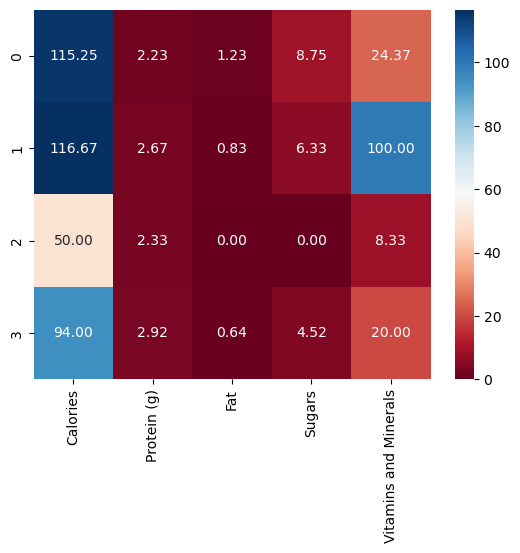

In [39]:
sns.heatmap(
    pd.DataFrame(Km_unscaled.cluster_centers_, columns=model_df.columns),
    cmap='RdBu',
    annot=True,
    fmt='0.2f'
)
plt.show();

In [40]:
map_unscaled = {
    0:'High Calories, low Protein, low fat',
    1:'High Calories, High Vitamin',
    2:'Moderate food values',
    3:'High calories'
}

df_unscaled = pd.Series(Km_unscaled.labels_,name='model2').map(map_unscaled)

In [41]:
df_unscaled

0                           High calories
1     High Calories, low Protein, low fat
2                           High calories
3                    Moderate food values
4     High Calories, low Protein, low fat
                     ...                 
69    High Calories, low Protein, low fat
70    High Calories, low Protein, low fat
71                          High calories
72                          High calories
73    High Calories, low Protein, low fat
Name: model2, Length: 74, dtype: object

In [48]:
df_combined = pd.concat([cereal,df_scaled,df_unscaled],axis=1)

In [49]:
df_combined

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1,model2
0,100%_Bran,Nabisco,70,4,1,6,25,Moderate food values,High calories
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0,"Low Protein, mdoerate sugar","High Calories, low Protein, low fat"
2,All-Bran,Kelloggs,70,4,1,5,25,Moderate food values,High calories
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25,"Low calories, fat, sugar",Moderate food values
4,Almond_Delight,Ralston Purina,110,2,2,8,25,"Low Protein, mdoerate sugar","High Calories, low Protein, low fat"
...,...,...,...,...,...,...,...,...,...
69,Triples,General Mills,110,2,1,3,25,"Low Protein, mdoerate sugar","High Calories, low Protein, low fat"
70,Trix,General Mills,110,1,1,12,25,"Low Protein, mdoerate sugar","High Calories, low Protein, low fat"
71,Wheat_Chex,Ralston Purina,100,3,1,3,25,Moderate food values,High calories
72,Wheaties,General Mills,100,3,1,3,25,Moderate food values,High calories


In [50]:
df_combined.groupby(['model1','model2'])[['Calories','Protein (g)','Fat','Sugars']].mean()

,,Calories,Protein (g),Fat,Sugars
model1,model2,,,,
"High Proetien, low sugar","High Calories, High Vitamin",116.666667,2.666667,0.833333,6.333333
"Low Protein, mdoerate sugar","High Calories, low Protein, low fat",115.250000,2.225000,1.225000,8.750000
"Low calories, fat, sugar",Moderate food values,50.000000,2.333333,0.000000,0.000000
Moderate food values,High calories,94.000000,2.920000,0.640000,4.520000


In [46]:
df_combined.model1.value_counts()

model1
Low Protein, mdoerate sugar    40
Moderate food values           25
High Proetien, low sugar        6
Low calories, fat, sugar        3
Name: count, dtype: int64

In [47]:
df_combined.model2.value_counts()

model2
High Calories, low Protein, low fat    40
High calories                          25
High Calories, High Vitamin             6
Moderate food values                    3
Name: count, dtype: int64